
# TxMM Assignment 3: Information Extraction
## Learning goals of this assignment:
1. Become familiar with the intricacies and challenges of time expression labelling
2. Practice with manual annotation using BIO tags
3. Learn how to compute inter-annotator agreement scores with Cohen’s kappa, and understand how to interpret these kappa scores
4. Define a set of patterns for extracting time patterns from text
5. Calculate precision for the output of your code on an unseen text
6. Gain insight into the importance of pattern generalizability
7. Reflect on the gap between labeling time expressions and the actual IE task of extracting and matching events from texts.

## Group Assignment

This assignment is a group assignment. For this assignment, ensure you are enrolled in an "Assignment 3 - Information Extraction" group on Brightspace with a group of three people.


## Practical information

Note that the assignment will be graded with a Pass/Fail system.

Whenever you have any questions, feel free to ask us in the open lunch hours on Mondays! You can also contact the TAs, Mats Robben, Nityaa Kalra and Raul Mihalca through discord or by sending a mail to nityaa.kalra@ru.nl, raul.mihalca@ru.nl and/or mats.robben@ru.nl.

We would appreciate it if you do not contact us via WhatsApp for non-urgent matters, so we can keep our TA work and private life (somewhat) separate.

We only support the use of [Google Colab](https://https://colab.research.google.com/) as all assignments have been implemented and tested using this. In case of (strange) bugs on other platforms, please consider switching to Colab to make sure that we can provide you with all the help you may need.

## Handing in the assignment:
Please hand in the following files:
- This notebook containing your answers in a .ipynb format.
- One .csv file containing all three of your BIO-tag annotations.

Please run the notebook before you hand in the assignment.

Only one of the group members has to hand in the assignment files on Brightspace.

# The Assignment


This assignment consists of two parts: the first part focuses on textual annotation of time expressions and the second part focuses on automatizing time expression extraction with regular expressions and normalizing them to a unified format.

The goal of this assignment is to let you practice in annotation labeling and reflect on the challenges when doing manual annotation of time expressions in text.

Recognizing time expressions is a crucial part of many NLP and IE applications. In this assignment we focus on date expressions in biography texts from Wikipedia.

# Part 1 - Manual Annotation & Inter-Annotator agreement

### Uploading files to Colab

Similar to a previous assignment you need to upload some files that are needed for the assignment in the working directory. For this assignment you need to upload the files *Yoshua_Bengio_bio_trainset.txt*,  *Yann_LeCunn_bio_devset.txt*,
*Fei-Fei_Li_bio_testset.txt* and *utils.py*.

Instead of using the upload functionality, you can also download the file directly in the notebook. Therefore you need to upload the files to https://transfer.sh/ then run the following command in a code cell using the URLs you created:

```
!wget <transfer.sh url>/Yoshua_Bengio_bio_trainset.txt
!wget <transfer.sh url>/Yann_LeCunn_bio_devset.txt
!wget <transfer.sh url>/Fei-Fei_Li_bio_testset.txt
!wget <transfer.sh url>/utils.py
```

Pay attention: The links expire after two weeks and you have to create new ones.

Note that it is not at all important that you achieve and report a high Cohen's kappa for this task. In a real text mining application, researchers often go through multiple cycles of annotation rounds to come up with consistent and clear annotation guidelines. Here you are starting with an initial round of annotations.


### Task 1: Perform Manual Annotation
Each of you individually annotates the date expressions in the biography text of Yoshua Bengio taken from Wikipedia without discussing the task together. This results in 3 versions (A,B,C) of the text with annotations. *Note: if you work in a group with less than three people it is alright to ask another group for one of their annotations.*

A **date expression** is a sequence within the text (can contain letters, numbers, and/or punctuation) that expresses a point in time or a period of time.

As annotation labels we use the B (begin), I (inside) and O (outside) labels to indicate if a token is part of a time expression or not.

We provide a text with one token per line as a starting point, you can find `Yoshua_Bengio_bio_TPL.csv` in the provided zip file. We advise you to use Excel or another editor that allows you to save the resulting annotations as a CSV file.

*After you individually created your annotated versions, combine them into one annotation file. Hand in the file together with this notebook on Brightspace.*

### Task 2: Compute Inter-Annotator Agreement
Upload the csv file and compute Cohen’s kappa between each pair of annotations (AB,BC,AC) and report the 3 scores. Use sklearn.metrics.cohen_kappa_score for this computation.

In [ ]:
from sklearn.metrics import cohen_kappa_score
### BEGIN SOLUTION
# import the libraries you need
import pandas as pd
### END SOLUTION

### BEGIN SOLUTION
# your code goes here
file_path = '/content/Yoshua_Bengio_bio_TPL.csv'
df = pd.read_csv(file_path)
A = df['Label-Vinicius']
B = df['Label-other-group']
C = df['Label-Feida']
kappa_AB = cohen_kappa_score(A, B)
kappa_BC = cohen_kappa_score(B, C)
kappa_AC = cohen_kappa_score(A, C)
print(f"Cohen's kappa between A and B: {kappa_AB}")
print(f"Cohen's kappa between B and C: {kappa_BC}")
print(f"Cohen's kappa between A and C: {kappa_AC}")
### END SOLUTION

Cohen's kappa between A and B: 0.4587143300783272
Cohen's kappa between B and C: 0.9586093894706846
Cohen's kappa between A and C: 0.45796404607269736


*Report on the three scores here* \
Cohen's kappa between A and B: 0.4587143300783272 \
Cohen's kappa between B and C: 0.9586093894706846 \
Cohen's kappa between A and C: 0.45796404607269736 \

### Task 3: Reflect on the Cohen's Kappa score:
#### 3.1) How do you interpret the kappa scores? Are all 3 scores similar?  What does a high score indicate?

#### 3.2) If you place the three columns of BIO tags next to each other, what are the cases where you disagreed? Can you explain why?

#### 3.3) Was the Kappa score metric suitable to evaluate the inter-annotator agreement on this task of time expression labeling, also taking into account the number of annotators?


*Your answer here*


3.1) Interpreting our kappa scores: 0.41–0.60 as moderate agreement, 0.61–0.80 as substantial agreement and 0.81–1.00 as almost perfect agreement. Some of the scores are not similar. The agreement between annotators B and C is much higher, indicating a larger agreement between these two annotators. However, the scores for A-B and A-C show lower agreement. A high kappa score means there is a lot of agreement between the manual annotations

3.2) It is because the annotations in A used I-date and B-date which causes the big difference in agreement, and the Cohen kappa compares I-date with I and gives it a lower agreement score. Finally, the word year also had disagreement which is the only one that B and C disagreed on being B or O.

3.3) It is a suitable metric if everyone follows the same annotation style. However, if there are more annotators we would need more combinations which might not scale well.



---


#Part 2 - Regular Expressions and Normalization *(Extracting timelines and matching events from biographies)*

## 2.1 - Loading & inspecting the Yann_LeCunn_bio_devset.txt

In this second part you implement a IE program that automatically extracts time expresssions from texts. We focus here on events described in two texts (the biographies of Yann Le Cunn and Fei-Fei Li) and you will find the matching events (i.e. overlapping dates) of the two timelines.

Here, your goal is to identify and extract date expressions from sentences.

First, you want to get an impression of the date expressions in the biography of Yann Le Cunn.
Run the next cell to see Yann_LeCunn_bio_devset.txt. *Don't look at Fei-Fei_Li_bio_testset.txt yet, this is an extraction of the biography of Fei-Fei Li!*

In [ ]:
import os
# Make sure Yann_LeCunn_bio_devset.txt and Fei-Fei_Li_bio_testset.txt are in the working directory.

def read_file(file_name):
  with open(file_name, "r") as f:
    return f.read()

working_dir = os.getcwd()  # get our working directory
train_file_path = os.path.join(working_dir, 'Yann_LeCunn_bio_devset.txt')
test_file_path = os.path.join(working_dir, 'Fei-Fei_Li_bio_testset.txt')

text_lecunn = read_file(train_file_path)
print(text_lecunn)


Yann André LeCun (born in the summer of 1960) is a French-American computer scientist working primarily in the fields of machine learning, computer vision, mobile robotics and computational neuroscience. He is the Silver Professor of the Courant Institute of Mathematical Sciences at New York University and Vice-President, Chief AI Scientist at Meta.

LeCun was born at Soisy-sous-Montmorency in the suburbs of Paris. His name was originally spelled Le Cun from the old Breton form Le Cunff and was from the region of Guingamp in northern Brittany. "Yann" is the Breton form for "John".

He received a Diplôme d'Ingénieur from the ESIEE Paris in 1983 and a PhD in Computer Science from Université Pierre et Marie Curie (today Sorbonne University) in 1987 during which he proposed an early form of the back-propagation learning algorithm for neural networks.

He is well known for his work on optical character recognition and computer vision using convolutional neural networks (CNNs). He is also on

### Task 1: Examine the biography of Yann Le Cunn, and notice the patterns in which the date expressions occur. List and describe your observations in the next cell.

Date expressions occur in the following patterns:
* A year, e.g. 1960
* Day month name, year, e.g. 9 December 2013
* A decade, e.g. 2010s

### Task 2: Implement the function *sentence_tokenize_text* so that it splits a text into a list of sentences.

*Note: we split the assignment in two parts as the first part used a word-per-line format, while in this second part we look at sentence-per-line.*

In [ ]:
### BEGIN SOLUTION
# import the libraries you need
import re
### END SOLUTION

def sentence_tokenize_text(text):
  """
  :param text: An input text, i.e. a string
  :return: A list of strings, where each string is one sentence
  """
  ### BEGIN SOLUTION
  return list(map(lambda s: s.strip(), re.split("[\.!?]\s+", text)))
  ### END SOLUTION

sentence_tokenize_text(text_lecunn)  # You can display the result for testing.

['Yann André LeCun (born in the summer of 1960) is a French-American computer scientist working primarily in the fields of machine learning, computer vision, mobile robotics and computational neuroscience',
 'He is the Silver Professor of the Courant Institute of Mathematical Sciences at New York University and Vice-President, Chief AI Scientist at Meta',
 'LeCun was born at Soisy-sous-Montmorency in the suburbs of Paris',
 'His name was originally spelled Le Cun from the old Breton form Le Cunff and was from the region of Guingamp in northern Brittany',
 '"Yann" is the Breton form for "John"',
 "He received a Diplôme d'Ingénieur from the ESIEE Paris in 1983 and a PhD in Computer Science from Université Pierre et Marie Curie (today Sorbonne University) in 1987 during which he proposed an early form of the back-propagation learning algorithm for neural networks",
 'He is well known for his work on optical character recognition and computer vision using convolutional neural networks (CNN

###Task 3: Implement the function *extract_date_expressions* so that it extracts date expressions from sentences.
**To ensure unbiased annotation of the test data in task 10, only one person of your group will annotate the test data. This person cannot look at the regex that is being developed in this task. The other two can develop the regex together.**

The function should take in our list of sentences and return a pandas DataFrame. This DataFrame has two columns:
- Date: The extracted date expressions
- Sentence: The sentence from which a data expression was extracted

**Write your own patterns** and do not rely on libraries that automatically extract date expressions as learning about regular expressions is one of the learning objectives of the exercise.

Use the Yann_LeCunn_bio_devset.txt and the manual annotation that you did on the biography of Yoshua Bengio as inspiration for your regular expressions.

*Hint: Check out https://regexr.com/ for testing and refining the regular expressions you use to capture date expressions. It also has a handy cheat sheet you can use. *

*For coding newbies: You can contact the TAs to get a regex example function in Python.*

In [ ]:
### BEGIN SOLUTION
import pandas as pd
### END SOLUTION

def extract_date_expressions(sentences):
  """
  :param sentences: A list of strings, where each string is one sentence
  :return: A pandas DataFrame with the columns
                "Date" (extracted date expressions as a string)
                "Sentence" (sentences from which a date expression was extracted)
  """
  ### BEGIN SOLUTION
  df_dict = {"Date":[], "Sentence":[]}
  pattern = r'(\s?([12]?\d|3[01])\s)?(\s?(January|February|March|April|May|June|July|August|September|October|November|December))?(\s?(((1|2)[\d]{3})))\s?'
  for sentence in sentences:
    for date in re.finditer(pattern, sentence):
      df_dict['Date'].append(date.group().strip())
      df_dict['Sentence'].append(sentence)

  return pd.DataFrame(df_dict)
  ### END SOLUTION

# Apply the function to the tokenized text:
df_dates_lecunn =  extract_date_expressions(sentence_tokenize_text(text_lecunn))
df_dates_lecunn # use this for testing

,Date,Sentence
0,1960,Yann André LeCun (born in the summer of 1960) ...
1,1983,He received a Diplôme d'Ingénieur from the ESI...
2,1987,He received a Diplôme d'Ingénieur from the ESI...
3,2010,"In the late 2010s, LeCun, Yoshua Bengio, and G..."
4,2012,"In 2012, he became the founding director of th..."
5,9 December 2013,"On 9 December 2013, LeCun became the first dir..."
6,2014,"On 9 December 2013, LeCun became the first dir..."
7,2013,"In 2013, he and Yoshua Bengio co-founded the I..."
8,1986,"He was the chair and organiser of the ""Learnin..."
9,2012,"He was the chair and organiser of the ""Learnin..."


### Task 4: Normalization: Implement the function *dates_to_iso8601* so that it converts a date expression string to the ISO 8601 date standard.
Then, add the ISO 8601 converted dates as a column ("ISO") to our dataframe.

You can find more info and examples on https://www.iso.org/iso-8601-date-and-time-format.html.

To implement the function check out Python’s inbuilt datetime module. you’ll find functions in there that can make this task a lot easier.

In [ ]:
from datetime import datetime, date

def date_expression_to_iso8601(date_string):
  """
  :param date_string: A string containing a date expression
  :return: A string containing the date in ISO 8601 format
  """
  ### BEGIN SOLUTION
  if re.match('[\d]{4}', date_string):
    return datetime.strptime(date_string, '%Y').date().isoformat()
  if re.match('[A-Za-z]+ [\d]{4}', date_string):
    return datetime.strptime(date_string, '%B %Y').date().isoformat()
  if re.match('[\d]{1,2} [A-Za-z]+ [\d]{4}', date_string):
    return datetime.strptime(date_string, '%d %B %Y').date().isoformat()
  ### END SOLUTION

# Now, add a column "ISO" to your DataFrame
### BEGIN SOLUTION
df_dates_lecunn["ISO"] = [date_expression_to_iso8601(date_string) for date_string in df_dates_lecunn['Date']]
### END SOLUTION
df_dates_lecunn  # use this for testing

,Date,Sentence,ISO
0,1960,Yann André LeCun (born in the summer of 1960) ...,1960-01-01
1,1983,He received a Diplôme d'Ingénieur from the ESI...,1983-01-01
2,1987,He received a Diplôme d'Ingénieur from the ESI...,1987-01-01
3,2010,"In the late 2010s, LeCun, Yoshua Bengio, and G...",2010-01-01
4,2012,"In 2012, he became the founding director of th...",2012-01-01
5,9 December 2013,"On 9 December 2013, LeCun became the first dir...",2013-12-09
6,2014,"On 9 December 2013, LeCun became the first dir...",2014-01-01
7,2013,"In 2013, he and Yoshua Bengio co-founded the I...",2013-01-01
8,1986,"He was the chair and organiser of the ""Learnin...",1986-01-01
9,2012,"He was the chair and organiser of the ""Learnin...",2012-01-01


###Task 5: In which respect does the ISO 8601 format defer from the date information present in the text? (If you noticed an additional issue caused by a discrepancy between the standard and the Python implementation please mention this as well.)

The ISO 8601 format will always represent date expressions in the same way, requiring the year, month and day to be present. In contrast, the date information in the text can be represented in the most suitable way to convey the desired information. This leads us to fill in missing values in the date expressions present in the text which only contain part of the date object, such as year.

### Task 6: Combine the previous steps in the function *get_sorted_df_from_file_name* so that it runs the whole date extraction pipeline and returns a DataFrame.
**Make sure to order the DataFrame rows chronologically according to the ISO dates!**

Consider the following example text:

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2024. Our Christmas holiday is from Friday 21 December 2024 - Friday 5 January 2025. We will celebrate Sinterklaas on 5 December 2024.

Here's an illustration of what the example text's DataFrame should look like:

|ISO |Date | Sentence |
|----:|----:|:----|
|2024-10-31 |31 October 2024| Halloween takes place on 31 October 2024.|
|2024-12-05 |5 December 2024| We will celebrate Sinterklaas on 5 December 2024.|
|2024-12-21 |21 December 2024| Our Christmas holiday is from Friday 21 December 2024 - Friday 5 January 2025.|
|2025-01-05 |5 January 2025| Our Christmas holiday is from Friday 21 December 2024 - Friday 5 January 2025.|

In [ ]:
def get_sorted_df_from_file_name(file_name):
  """
  :param file_name: A string containing the full path to a file
  :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO"
          (see above), where rows are sorted according to "ISO"
  """
  ### BEGIN SOLUTION
  # Extract dates, then sort by ISO
  file_contents = read_file(file_name)
  sentences = sentence_tokenize_text(file_contents)
  date_expressions_df = extract_date_expressions(sentences)
  date_expressions_df['ISO'] = [date_expression_to_iso8601(date_string) for date_string in date_expressions_df['Date']]
  date_expressions_df['ISO'] = pd.to_datetime(date_expressions_df['ISO'])
  return date_expressions_df.set_index('ISO').sort_index()
  ### END SOLUTION

get_sorted_df_from_file_name(train_file_path)

,Date,Sentence
ISO,,
1960-01-01,1960,Yann André LeCun (born in the summer of 1960) ...
1983-01-01,1983,He received a Diplôme d'Ingénieur from the ESI...
1986-01-01,1986,"He was the chair and organiser of the ""Learnin..."
1987-01-01,1987,He received a Diplôme d'Ingénieur from the ESI...
2010-01-01,2010,"In the late 2010s, LeCun, Yoshua Bengio, and G..."
2012-01-01,2012,"In 2012, he became the founding director of th..."
2012-01-01,2012,"He was the chair and organiser of the ""Learnin..."
2013-01-01,2013,"In 2013, he and Yoshua Bengio co-founded the I..."
2013-12-09,9 December 2013,"On 9 December 2013, LeCun became the first dir..."


## 2.2 - Manual labeling: Yann_LeCunn_bio_devset.txt
To evaluate your date expression pipeline, you first need to have gold labels. For Part 2 we use another labeling format to simplify the regex matching. Let's familiarize ourselves with this format.

Look at our example text again:

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2024. Our Christmas holiday is from Friday 21 December 2024 - Friday 5 January 2025. We will celebrate Sinterklaas on 5 December 2024.


This is how we store the gold labels for this example text:
~~~python
example_manual_labels = [
  {"Dates": [],
    "Sentence": "This is an example text about interesting upcoming dates."},
  {"Dates": ["2025-10-31"],
    "Sentence": "The next Halloween takes place on 31 October 2024."},
  {"Dates": ["2024-12-21", "2025-01-05"],
    "Sentence": "Our Christmas holiday is from Friday 21 December 2024-Friday 5 January 2025."},
  {"Dates": ["2024-12-05"],
    "Sentence": "We will celebrate Sinterklaas on 5 December 2024."}
  ]
~~~

As you can see, we use a list of dictionaries. We have one dictionary for each sentence. This dictionary has two keys:
- Key "Sentence": The corresponding value is the sentence (i.e. a string).
- Key "Dates": The corresponding value is a list of all date expressions (strings; correctly converted to the ISO 8601 date standard) that appear in that sentence. If a sentence does not contain any date expressions, this list is empty.


We've created a helper function that automatically provides a template list based on *your sentence_tokenize_text* function. Run the cell below to get this template for *text_lecunn*:

In [ ]:
def get_manual_labeling_list(text):
  """
  A helper function to print a manual labeling list in which you only have to
  fill in the dates for each sentence.
  :param text: An input text, i.e. a string
  """
  tokenized_text = sentence_tokenize_text(text)
  return [{"Dates": [], "Sentence": tokenized_text[i]} for i in range(len(tokenized_text))]

get_manual_labeling_list(text_lecunn)

[{'Dates': [],
  'Sentence': 'Yann André LeCun (born in the summer of 1960) is a French-American computer scientist working primarily in the fields of machine learning, computer vision, mobile robotics and computational neuroscience'},
 {'Dates': [],
  'Sentence': 'He is the Silver Professor of the Courant Institute of Mathematical Sciences at New York University and Vice-President, Chief AI Scientist at Meta'},
 {'Dates': [],
  'Sentence': 'LeCun was born at Soisy-sous-Montmorency in the suburbs of Paris'},
 {'Dates': [],
  'Sentence': 'His name was originally spelled Le Cun from the old Breton form Le Cunff and was from the region of Guingamp in northern Brittany'},
 {'Dates': [], 'Sentence': '"Yann" is the Breton form for "John"'},
 {'Dates': [],
  'Sentence': "He received a Diplôme d'Ingénieur from the ESIEE Paris in 1983 and a PhD in Computer Science from Université Pierre et Marie Curie (today Sorbonne University) in 1987 during which he proposed an early form of the back-propaga

### Task 7: Manually label all sentences from Yann_LeCunn_bio_devset.txt.   
Copy the template list output by our helper function for Yann_LeCunn_bio_devset.txt into the cell below. Then manually fill the list *lecunn_manual_labels* with the dates (in correct ISO 8601 format) from each sentence.

In [ ]:
lecunn_manual_labels = [{'Dates': ['1960-01-01'],
  'Sentence': 'Yann André LeCun (born in the summer of 1960) is a French-American computer scientist working primarily in the fields of machine learning, computer vision, mobile robotics and computational neuroscience'},
 {'Dates': [],
  'Sentence': 'He is the Silver Professor of the Courant Institute of Mathematical Sciences at New York University and Vice-President, Chief AI Scientist at Meta'},
 {'Dates': [],
  'Sentence': 'LeCun was born at Soisy-sous-Montmorency in the suburbs of Paris'},
 {'Dates': [],
  'Sentence': 'His name was originally spelled Le Cun from the old Breton form Le Cunff and was from the region of Guingamp in northern Brittany'},
 {'Dates': [], 'Sentence': '"Yann" is the Breton form for "John"'},
 {'Dates': ['1983-01-01', '1987-01-01'],
  'Sentence': "He received a Diplôme d'Ingénieur from the ESIEE Paris in 1983 and a PhD in Computer Science from Université Pierre et Marie Curie (today Sorbonne University) in 1987 during which he proposed an early form of the back-propagation learning algorithm for neural networks"},
 {'Dates': [],
  'Sentence': 'He is well known for his work on optical character recognition and computer vision using convolutional neural networks (CNNs)'},
 {'Dates': [],
  'Sentence': 'He is also one of the main creators of the DjVu image compression technology (together with Léon Bottou and Patrick Haffner)'},
 {'Dates': [],
  'Sentence': 'He co-developed the Lush programming language with Léon Bottou'},
 {'Dates': ['2010-01-01'],
  'Sentence': 'In the late 2010s, LeCun, Yoshua Bengio, and Geoffrey Hinton, received the Turing Award for their work on deep learning'},
 {'Dates': [],
  'Sentence': 'The three are sometimes referred to as the "Godfathers of AI" and "Godfathers of Deep Learning"'},
 {'Dates': ['2012-01-01'],
  'Sentence': 'In 2012, he became the founding director of the NYU Center for Data Science'},
 {'Dates': ['2013-12-09', '2014-01-01'],
  'Sentence': 'On 9 December 2013, LeCun became the first director of Meta AI Research in New York City, and stepped down from the NYU-CDS directorship in early 2014'},
 {'Dates': ['2013-01-01'],
  'Sentence': 'In 2013, he and Yoshua Bengio co-founded the International Conference on Learning Representations, which adopted a post-publication open review process he previously advocated on his website'},
 {'Dates': ['1986-01-01', '2012-01-01'],
  'Sentence': 'He was the chair and organiser of the "Learning Workshop" held every year between 1986 and 2012 in Snowbird, Utah'},
 {'Dates': [],
  'Sentence': 'He is a member of the Science Advisory Board of the Institute for Pure and Applied Mathematics at UCLA'},
 {'Dates': [],
  'Sentence': 'He is the Co-Director of the Learning in Machines and Brain research program (formerly Neural Computation & Adaptive Perception) of CIFAR'},
 {'Dates': ['2016-01-01'],
  'Sentence': 'In 2016, he was the visiting professor of computer science on the "Chaire Annuelle Informatique et Sciences Numériques" at Collège de France in Paris, where he presented the "leçon inaugurale" (inaugural lecture)'},
 {'Dates': ['2023-01-01'], 'Sentence': 'In 2023, he was named as the inaugural Jacob T'},
 {'Dates': [],
  'Sentence': "Schwartz Chaired Professor in Computer Science at NYU's Courant Institute"},
 {'Dates': [],
  'Sentence': 'LeCun is also a scientific advisor to French research group Kyutai which is being funded by Xavier Niel, Rodolphe Saadé, Eric Schmidt, and others'},
 {'Dates': [],
  'Sentence': 'Text from https://en.wikipedia.org/wiki/Yann_LeCun, adapted by the teaching team.'}]


Now that we have labels for Yann_LeCunn_bio_devset.txt, we can plot a confusion matrix to get an impression of your extraction procedure's performance:

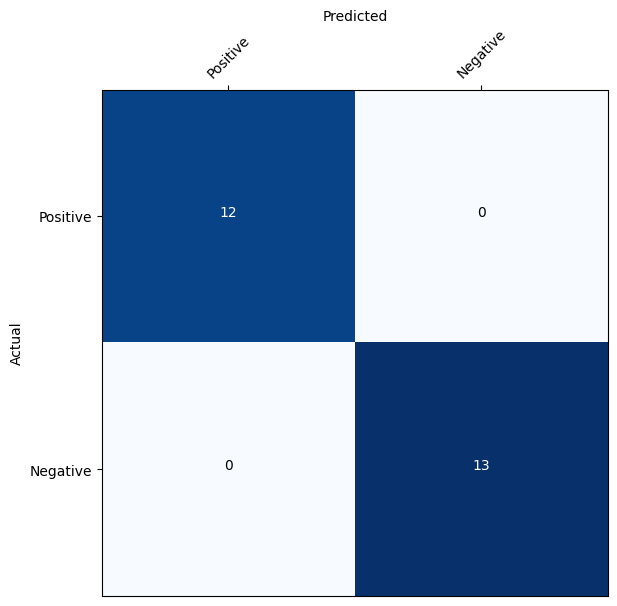

In [ ]:
from utils import plot_confusion_matrix

plot_confusion_matrix(manual_labels = lecunn_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name(train_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

### Task 8: Manually calculate the precision and recall of your date expression procedure on Yann_LeCunn_bio_devset.txt.
Write your calculation into the cell below. Write your *full* calculation including the formula you are using.

Hint: You can use $\LaTeX$ here.
- To display a formula inline, surround it by the '\$' sign.
    - For example, '\$ 4=2^2 \$' will be displayed like this: $4=2^2$
- To display a formula in a block, surround it by '\$\$'.
    - For example, '\$\$ 16=4^2 \$\$' will be displayed like this: $$16=4^2$$

$precision = \frac{\text{True positives}}{\text{True positives} + \text{False positives}} = \frac{12}{12 + 0} = 1$

$recall = \frac{\text{True positives}}{\text{True positives} + \text{False negatives}} = \frac{12}{12 + 0} = 1$

**Now, repeat the following steps until you are satisfied with the performance:**
1. Run the date expression procedure on Yann_LeCunn_bio_devset.txt.
2. Make adaptations to your code if necessary.
3. Go through the output manually and calculate precision and recall. **Make sure the cell above contains the latest calculation.**

Once you are satisfied with your performance, proceed to the next part of this assignment.

### Task 9: Discuss the difficulties you encountered during each repeat of the above steps to develop the time patterns.  ####

After our first try, we had already achieved both a precision and a recall of 1, so we didn't make any changes to our initial code. It was, however, a bit tricky to figure out the regex to extract all the date expressions from the text. Since we didn't want to use muliple regexes, we had to do some experimenting with different regular expressions before we had it figured out. One thing that helped was to use [debuggex](https://www.debuggex.com/), which is a tool that lets you visualize the regex tree as you build it.

## 2.3 - Applying the extraction procedure to the unseen Fei-Fei_Li_bio_testset.txt
Next, we will test your date extraction procedure and see how it performs on the unseen file Fei-Fei_Li_bio_testset.txt. First, let's have a look at the text inside this file:

In [ ]:
text_feifei = read_file(test_file_path)
print(text_feifei)

Fei-Fei Li (born July 3, 1976) is a Chinese-American computer scientist, known for establishing ImageNet, the dataset that enabled rapid advances in computer vision in the 2010s. She is the Sequoia Capital professor of computer science at Stanford University and former board director at Twitter. Li is a co-director of the Stanford Institute for Human-Centered Artificial Intelligence and a co-director of the Stanford Vision and Learning Lab. She served as the director of the Stanford Artificial Intelligence Laboratory from 2013 to 2018.

In 2017, she co-founded AI4ALL, a nonprofit organization working to increase diversity and inclusion in the field of artificial intelligence. Her research expertise includes artificial intelligence, machine learning, deep learning, computer vision and cognitive neuroscience.

In September 2017, Google secured a contract from the Department of Defense called Project Maven, which aimed to use AI techniques to interpret images captured by drone cameras. Go

### Task 10: Manually label all sentences from Fei-Fei_Li_bio_testset.txt
**The one person that didn't work on the regex has to be the person to annotate the test file**

The following cell gives you the template list.
Fill the list *feifei_manual_labels* (just like you previously did for Yann_LeCunn_bio_devset.txt) in the cell under the following one with the dates from the text.

In [ ]:
get_manual_labeling_list(text_feifei)

[{'Dates': [],
  'Sentence': 'Fei-Fei Li (born July 3, 1976) is a Chinese-American computer scientist, known for establishing ImageNet, the dataset that enabled rapid advances in computer vision in the 2010s'},
 {'Dates': [],
  'Sentence': 'She is the Sequoia Capital professor of computer science at Stanford University and former board director at Twitter'},
 {'Dates': [],
  'Sentence': 'Li is a co-director of the Stanford Institute for Human-Centered Artificial Intelligence and a co-director of the Stanford Vision and Learning Lab'},
 {'Dates': [],
  'Sentence': 'She served as the director of the Stanford Artificial Intelligence Laboratory from 2013 to 2018'},
 {'Dates': [],
  'Sentence': 'In 2017, she co-founded AI4ALL, a nonprofit organization working to increase diversity and inclusion in the field of artificial intelligence'},
 {'Dates': [],
  'Sentence': 'Her research expertise includes artificial intelligence, machine learning, deep learning, computer vision and cognitive neuros

In [ ]:
feifei_manual_labels = [
 {'Dates': ['1976-07-03'],
  'Sentence': 'Fei-Fei Li (born July 3, 1976) is a Chinese-American computer scientist, known for establishing ImageNet, the dataset that enabled rapid advances in computer vision in the 2010s'},
 {'Dates': [],
  'Sentence': 'She is the Sequoia Capital professor of computer science at Stanford University and former board director at Twitter'},
 {'Dates': [],
  'Sentence': 'Li is a co-director of the Stanford Institute for Human-Centered Artificial Intelligence and a co-director of the Stanford Vision and Learning Lab'},
 {'Dates': ['2013-01-01', '2018-01-01'],
  'Sentence': 'She served as the director of the Stanford Artificial Intelligence Laboratory from 2013 to 2018'},
 {'Dates': ['2017-01-01'],
  'Sentence': 'In 2017, she co-founded AI4ALL, a nonprofit organization working to increase diversity and inclusion in the field of artificial intelligence'},
 {'Dates': [],
  'Sentence': 'Her research expertise includes artificial intelligence, machine learning, deep learning, computer vision and cognitive neuroscience'},
 {'Dates': ['2017-09-01'],
  'Sentence': 'In September 2017, Google secured a contract from the Department of Defense called Project Maven, which aimed to use AI techniques to interpret images captured by drone cameras'},
 {'Dates': ['2018-06-01'],
  'Sentence': 'Google told employees who protested the company\'s work on Project Maven that their role was "specifically scoped to be for non-offensive purposes." In June 2018, Google told employees it would not seek renewal of the contract'},
 {'Dates': [],
  'Sentence': 'In internal emails which were later leaked to reporters, Li expressed enthusiasm for the Google Cloud role in Project Maven, but warned against mentioning its AI component, saying that military AI is linked in the public mind with the danger of autonomous weapons'},
 {'Dates': [],
  'Sentence': 'Asked about those leaked emails, Li told The New York Times, "I believe in human-centered AI to benefit people in positive and benevolent ways'},
 {'Dates': ['2018-09-01'],
  'Sentence': 'It is deeply against my principles to work on any project that I think is to weaponize AI."\n\nIn the fall of 2018, Li left Google and returned to Stanford University to continue her professorship'},
 {'Dates': ['2020-05-01'],
  'Sentence': 'In May 2020, Li joined the board of directors of Twitter as an independent director'},
 {'Dates': ['2022-10-27'],
  'Sentence': "On October 27, 2022, following Elon Musk’s purchase of the company, Li and eight others were removed from Twitter's nine-member board of directors, leaving Elon as the sole director"},
 {'Dates': ['2023-08-03'],
  'Sentence': 'On 3 August 2023, Li Fei Fei was announced as a member of the United Nations (UN) Scientific Advisory Board, established by Secretary-General António Guterres'},
 {'Dates': ['2023-01-01'],
  'Sentence': 'Li was named in the Time 100 AI Most Influential People list in 2023 and received the Intel Lifetime Achievements Innovation Award in the same year for her contributions to artificial intelligence'},
 {'Dates': ['2020-01-01', '2021-01-01'],
  'Sentence': 'She was elected as a member of the National Academy of Engineering and the National Academy of Medicine in 2020, and the American Academy of Arts and Sciences in 2021'},
 {'Dates': ['2023-08-03'],
  'Sentence': 'On August 3, 2023, it was announced that Li was appointed to the United Nations Scientific Advisory Board, established by Secretary-General Antonio Guterres'},
 {'Dates': ['2024-01-01'],
  'Sentence': 'In 2024, Li made to the Gold House’s most impactful Asian A100 list'},
 {'Dates': [],
  'Sentence': 'Text from https://en.wikipedia.org/wiki/Fei-Fei_Li, adapted by the teaching team.'}]

**Now, let's run your date expression procedure on the unseen text *Fei-Fei_Li_bio_testset.txt* and look at the resulting DataFrame.**


In [ ]:
get_sorted_df_from_file_name(test_file_path)

,Date,Sentence
ISO,,
1976-01-01,1976,"Fei-Fei Li (born July 3, 1976) is a Chinese-Am..."
2010-01-01,2010,"Fei-Fei Li (born July 3, 1976) is a Chinese-Am..."
2013-01-01,2013,She served as the director of the Stanford Art...
2017-01-01,2017,"In 2017, she co-founded AI4ALL, a nonprofit or..."
2017-09-01,September 2017,"In September 2017, Google secured a contract f..."
2018-01-01,2018,She served as the director of the Stanford Art...
2018-01-01,2018,It is deeply against my principles to work on ...
2018-06-01,June 2018,Google told employees who protested the compan...
2020-01-01,2020,She was elected as a member of the National Ac...


### Task 11:  Make adaptations to your date extraction code if necessary. Do not change the functions from the previous part in this assignment, but make your adjustments by changing the three functions below.

Currently, each of these "adapted" functions just uses the functions from the previous parts. If you want to make any changes to one of the functions, overwrite this return statement with your changes.

In [ ]:
def sentence_tokenize_text_adapted(text):
  """
  :param text: An input text, i.e. a string
  :return: A list of strings, where each string is one sentence
  """
  # change this if you want to adapt your original function
  return sentence_tokenize_text(text)


def extract_date_expressions_adapted(sentences):
  """
  :param sentences: A list of strings, where each string is one sentence
  :return: A pandas DataFrame with the columns
                "Date" (extracted date expressions as a string)
                "Sentence" (sentences from which a date expression was extracted)
  """
  # change this if you want to adapt your original function
  df_dict = {"Date":[], "Sentence":[]}
  pattern = '(((\s?([12]?\d|3[01])\s)?(\s?(January|February|March|April|May|June|July|August|September|October|November|December))?)|(\s?(January|February|March|April|May|June|July|August|September|October|November|December))?(\s?([12]?\d|3[01]),\s)?)(\s?(((1|2)[\d]{3})))\s?'
  for sentence in sentences:
    for date in re.finditer(pattern, sentence):
      df_dict['Date'].append(date.group().strip())
      df_dict['Sentence'].append(sentence)

  return pd.DataFrame(df_dict)


def date_expression_to_iso8601_adapted(date_string):
  """
  :param date_string: A string containing a date expression
  :return: A string containing the date in ISO 8601 format
  """
  # change this if you want to adapt your original function
  if re.match('[\d]{4}', date_string):
    return datetime.strptime(date_string, '%Y').date().isoformat()
  if re.match('[A-Za-z]+ [\d]{4}', date_string):
    return datetime.strptime(date_string, '%B %Y').date().isoformat()
  if re.match('[\d]{1,2} [A-Za-z]+ [\d]{4}', date_string):
    return datetime.strptime(date_string, '%d %B %Y').date().isoformat()
  if re.match('[A-Za-z]+ [\d]{1,2}, [\d]{4}', date_string):
    return datetime.strptime(date_string, '%B %d, %Y').date().isoformat()


def get_sorted_df_from_file_name_adapted(file_name):
  """
  :param file_name: A string containing the full path to a file
  :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO"
          (see above), where rows are sorted according to "ISO"
  """
  # change this if you want to adapt your original function
  file_contents = read_file(file_name)
  sentences = sentence_tokenize_text(file_contents)
  date_expressions_df = extract_date_expressions_adapted(sentences)
  date_expressions_df['ISO'] = [date_expression_to_iso8601_adapted(date_string) for date_string in date_expressions_df['Date']]
  date_expressions_df['ISO'] = pd.to_datetime(date_expressions_df['ISO'])
  return date_expressions_df.set_index('ISO').sort_index()

### Task 12: Discuss the difficulties you encountered extracting the new timeline. Also address the adaptations that you needed to make for processing the unseen biography Fei-Fei_Li_bio_testset.txt.

Write your discussion into the cell below.

Our initial functions did not need any adaptations to make it perform well on the unseen Feifei testset, we observed that the regular expression captured most of the date expressions correctly. Therefore, we did not encounter any issues processing the unseen dataset. However, we did not get all of them correct which might be an issue.


**Now, we can evaluate your adapted date expression procedure. Let's plot one confusion matrix for each of the text files. **

Confusion matrix for Yann Le Cunn:


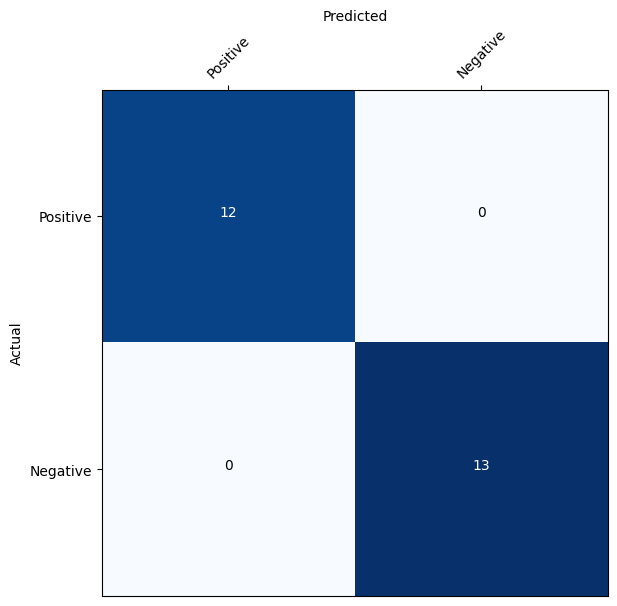

Confusion matrix for Fei-Fei Li:


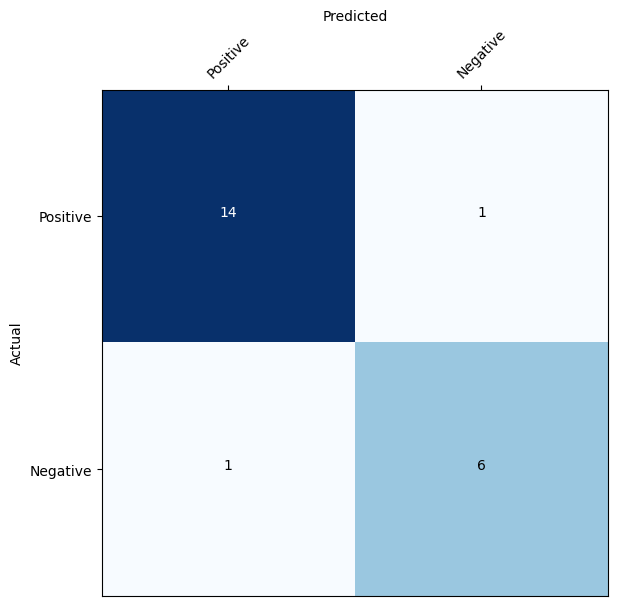

In [ ]:
print('Confusion matrix for Yann Le Cunn:')
plot_confusion_matrix(manual_labels = lecunn_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name_adapted(train_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

print('Confusion matrix for Fei-Fei Li:')
plot_confusion_matrix(manual_labels = feifei_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name_adapted(test_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

### Task 13: Calculate the precision and recall of your adapted date expression procedure on both Yann_LeCunn_bio_devset.txt and Fei-Fei_Li_bio_testset.txt.

Write your calculations into the cell below.

*Your precision and recall calculations go here*

For Yann_LeCunn_bio_devset.txt

$precision = \frac{\text{True positives}}{\text{True positives} + \text{False positives}} = \frac{12}{12 + 0} = 1$

$recall = \frac{\text{True positives}}{\text{True positives} + \text{False negatives}} = \frac{12}{12 + 0} = 1$

For Fei-Fei_Li_bio_testset.txt

$precision = \frac{\text{True positives}}{\text{True positives} + \text{False positives}} = \frac{14}{14 + 1} = 0.933$

$recall = \frac{\text{True positives}}{\text{True positives} + \text{False negatives}} = \frac{14}{14 + 1} = 0.933$

### Task 14: Compare the precision and recall scores on Yann_LeCunn_bio_devset.txt and Fei-Fei_Li_bio_testset.txt. Address the following points:
- Did the values of Yann_LeCunn_bio_devset.txt change after your adaptions?
- Are there any differences between the two texts?
- If so, where does this difference come from?
- What does this difference mean in terms of generalizability?

*Your answer goes here*

The precision and recall for the Yann LeCun biography did not change because we we only extended the regex in the date extraction function, so the original dates extracted kept working as normal. However, for Fei-Fei Li, the precision and recall were slightly lower. This was casused by a single date expression, namely, the text contains a reference to "the 2010s", which was picked up by the automatic date extraction function, but not by the manual annotator. Examples like this show that creating a function that generalizes well to extracting date expressions is quite difficult, since there are many ways to refer to dates or periods of time. The result is that the date extraction function becomes more complex with time, as it already was the case with our `extract_date_expressions_adapted` function, which already contained a quite long regex.

### Task 15: Take a closer look at the errors your automatic extraction method makes. What is happening there?

In [ ]:
# I ADDED THIS CODEBLOCK MYSELF -Feida

sorted_date_df = get_sorted_df_from_file_name_adapted(test_file_path)
print(feifei_manual_labels)
print(sorted_date_df)

[{'Dates': ['1976-07-03'], 'Sentence': 'Fei-Fei Li (born July 3, 1976) is a Chinese-American computer scientist, known for establishing ImageNet, the dataset that enabled rapid advances in computer vision in the 2010s'}, {'Dates': [], 'Sentence': 'She is the Sequoia Capital professor of computer science at Stanford University and former board director at Twitter'}, {'Dates': [], 'Sentence': 'Li is a co-director of the Stanford Institute for Human-Centered Artificial Intelligence and a co-director of the Stanford Vision and Learning Lab'}, {'Dates': ['2013-01-01', '2018-01-01'], 'Sentence': 'She served as the director of the Stanford Artificial Intelligence Laboratory from 2013 to 2018'}, {'Dates': ['2017-01-01'], 'Sentence': 'In 2017, she co-founded AI4ALL, a nonprofit organization working to increase diversity and inclusion in the field of artificial intelligence'}, {'Dates': [], 'Sentence': 'Her research expertise includes artificial intelligence, machine learning, deep learning, com

*Your answer goes here*

As mentioned previously, the error is in the first sentence, where there is a reference to "the 2010s", which is picked up by the date extraction function, but not by the manual annotation.

###Task 16: Reflect on the relation between date mentions in the texts and the events that they denote, reflect on duration and overlap of events. (max. 4 sentences)

*Your answer goes here*

The dates in the textfiles are often associated with milestones in the individuals' careers. These are often expressed as simply the year in which that milestone was achieved, which results in some events in the text happening in the "same date", even though they proabably only share the same year. The same effect can be seen for a given month in a year, e.g. May 2022.


## 2.4 - Finding matching events

### Task 17: Find the matching events (i.e. overlapping dates in the two biographical timelines) between the two timelines.

You could do this in one of the following ways:
- **Command line** We highly encourage you to use the ‘comm’ function on your ISO-8601 dates in your command line (more info and example: https://www.computerhope.com/unix/ucomm.htm. Note that this command also works on Mac OS/Windows).
- **Python** It is also allowed to find the matching events programmatically in Python.
- **Online tool ** You can use an online tool (e.g. https://text-compare.com/).

**Important: Do not search for matching events manually!**

Please put the command, the code or the link to the website you used into the cell below or briefly describe how you found the matching events.  

Then, also paste the list of matching events (in ISO-8601 format) into that cell.


In [ ]:
sorted_date_df_1 = get_sorted_df_from_file_name(train_file_path)
sorted_date_df_2 = get_sorted_df_from_file_name(test_file_path)

print(sorted_date_df_1)
print(sorted_date_df_2)

lecunn_dates = sorted_date_df_1.index.astype(str).tolist()
feifei_dates = sorted_date_df_2.index.astype(str).tolist()

matching_dates = set(lecunn_dates).intersection(feifei_dates)

print("Matching dates between Yann LeCun and Fei-Fei Li:")
print(matching_dates)


                       Date                                           Sentence
ISO                                                                           
1960-01-01             1960  Yann André LeCun (born in the summer of 1960) ...
1983-01-01             1983  He received a Diplôme d'Ingénieur from the ESI...
1986-01-01             1986  He was the chair and organiser of the "Learnin...
1987-01-01             1987  He received a Diplôme d'Ingénieur from the ESI...
2010-01-01             2010  In the late 2010s, LeCun, Yoshua Bengio, and G...
2012-01-01             2012  In 2012, he became the founding director of th...
2012-01-01             2012  He was the chair and organiser of the "Learnin...
2013-01-01             2013  In 2013, he and Yoshua Bengio co-founded the I...
2013-12-09  9 December 2013  On 9 December 2013, LeCun became the first dir...
2014-01-01             2014  On 9 December 2013, LeCun became the first dir...
2016-01-01             2016  In 2016, he was the vis

*Your description goes here*

*Your list goes here* \
Matching dates between Yann LeCun and Fei-Fei Li:
{'2010-01-01', '2023-01-01', '2013-01-01'}

### Task 18: Discussion of matching events
1. Discuss the list of matching events that you found.
2. When going through the texts manually, do you find matching events that you did not find programmatically/automatically?
3. If so, what could be the reason(s) for this? Discuss your answers to these questions and any other difficulties you encountered during the extraction of matching events.

*Your answer goes here* \
We found three matching dates between the timelines of Yann LeCun and Fei-Fei Li: 2010-01-01, 2013-01-01, and 2023-01-01. However, these matches occur due to some events in the biographies being referenced by a whole decade, e.g. "2010s", which are normalized to "2010-01-01" by our approach. In our case all matches happened to reference the same period, i.e.: 2010s, 2013 and 2023, which were are transformed to "2010-01-01", "2013-01-01", "2023-01-01" respectivelly. Nevertheless, our approach could have introduced inconsistencies when matching against dates that have been annotated differently in the manual labels. For instance, if a text references the "2010s" and another text references "January 2010", both would be normalized to "2010-01-01" by our approach and would be considered a match, even though they do not reference the exact same time period.

In [ ]:
print('Congratulations! You finished this assignment!')
print('We would like to thank Theo Kent for letting us use his notebook as a basis for this assignment!')

Congratulations! You finished this assignment!
We would like to thank Theo Kent for letting us use his notebook as a basis for this assignment!


Please look at the ***Handing in the assignment*** section for instructions on what to hand in.